In [5]:
import numpy
import pandas
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
boston = load_boston() # this will create an object with the name boston

In [7]:
boston.data.shape # we get the shape of indepnendent vars

(506, 13)

In [8]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
boston.target #506 prices of houses

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
print("min price of the house is ", numpy.min(boston.target))
print("max price of the house is ", numpy.max(boston.target))
print("mean price of the house is ", numpy.mean(boston.target))

min price of the house is  5.0
max price of the house is  50.0
mean price of the house is  22.532806324110677


In [11]:
bos = pandas.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
bos.columns = boston.feature_names
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [13]:
bos['price']=boston.target
bos.head(2)
#this is a place where you come when you read your external file

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [16]:
# step 1 is seggregate independent and dependent vars
indep_vars=bos.drop('price', axis=1) #now will have only independent vars
model=LinearRegression()
model.fit(indep_vars, bos.price)
print("intercept is ", model.intercept_)
print("slopes are ", model.coef_)

intercept is  36.45948838509015
slopes are  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


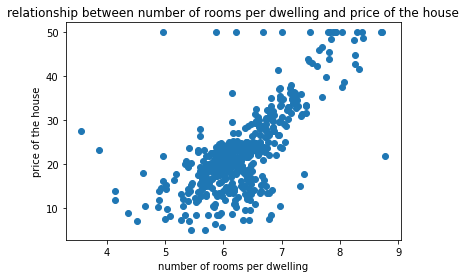

In [17]:
plt.scatter(bos.RM, bos.price)
plt.xlabel("number of rooms per dwelling")
plt.ylabel("price of the house")
plt.title("relationship between number of rooms per dwelling and price of the house")
plt.show()

In [18]:
x_train, x_test, y_train,y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=5)
print("shape of x_train is ", x_train.shape)
print("shape of y_train is ", y_train.shape)
print("shape of x_test is ", x_test.shape)
print("shape of y_test is ", y_test.shape)

shape of x_train is  (354, 13)
shape of y_train is  (354,)
shape of x_test is  (152, 13)
shape of y_test is  (152,)


In [19]:
model=LinearRegression()
model.fit(x_train, y_train)
pv=model.predict(x_test)
print("MSE of the model is ", mean_squared_error(pv, y_test))
print("R2 value of model is ", r2_score(pv, y_test))

MSE of the model is  30.69703770408852
R2 value of model is  0.5627774543791304


In [20]:
MSE = numpy.mean((y_test - pv)**2)
print("MSE of the model is ", MSE)

MSE of the model is  30.69703770408852


In [ ]:
import numpy
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

car= pd.read_csv('C:\\Users\\walia\\Downloads\\mtcars_for_manymerge.csv')
car.head(10)
car.shape
indep_vars=car.drop(['mpg','Cars','Feedback'] ,axis=1) #now will have only independent vars
plt.scatter(car.hp, car.mpg)
plt.show()

x_train, x_test, y_train,y_test = train_test_split(indep_vars, car.mpg, test_size=0.3, random_state=5)
print("shape of x_train is ", x_train.shape)
print("shape of y_train is ", y_train.shape)
print("shape of x_test is ", x_test.shape)
print("shape of y_test is ", y_test.shape)

model=LinearRegression()
model.fit(x_train, y_train)
pv=model.predict(x_test)
print("MSE of the model is ", mean_squared_error(pv, y_test))
print("R2 value of model is ", r2_score(pv, y_test))